In [1]:
# Загрузка библиотек

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Датасет: freMPL (French Motor Personal Line datasets)

Источник данных: http://cas.uqam.ca/

Продукт: КАСКО

Набор из 10 датасетов частного французского автостраховщика. Каждый датасет содержит характеристики риска, суммы величин страховых требований и истории страховых исков по около 30 000 страховых полисов за 2004 год.

In [2]:
# Загрузка набора данных в pandas DataFrame

df = pd.read_csv('freMPL-R.csv', low_memory=False)

In [3]:
df['PolicyCount'] = 1
df['ClaimCount'] = df['ClaimAmount'] > 0
df_group_vc = df[['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount']].groupby(df['VehMaxSpeed']).sum()
df_group_vc = df_group_vc.reset_index()
df_group_vc['Freq'] = df_group_vc.ClaimCount / df_group_vc.Exposure
df_group_vc['AvgClaim'] = df_group_vc.ClaimAmount / df_group_vc.ClaimCount

Сбалансированность выборки

In [4]:
dict(zip(df_group_vc['VehMaxSpeed'], df_group_vc['ClaimCount']))

{'1-130 km/h': 77.0,
 '130-140 km/h': 256.0,
 '140-150 km/h': 388.0,
 '150-160 km/h': 1022.0,
 '160-170 km/h': 1211.0,
 '170-180 km/h': 1173.0,
 '180-190 km/h': 885.0,
 '190-200 km/h': 776.0,
 '200-220 km/h': 715.0,
 '220+ km/h': 505.0}

### Зависимость частоты убытков от VehMaxSpeed

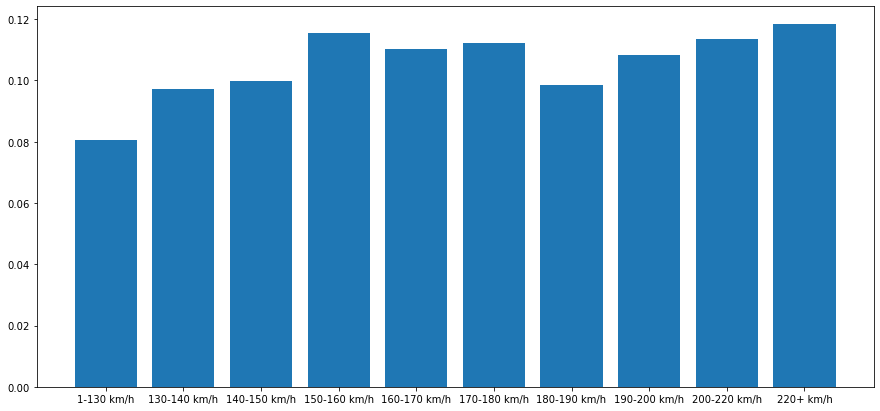

In [5]:
plt.figure(figsize=(15, 7))
plt.bar(df_group_vc['VehMaxSpeed'], df_group_vc['Freq'])
plt.show()

Наблюдается тренд роста частоты убытков от роста максимальной скорости авто.

### Зависимость среднего убытка от VehMaxSpeed

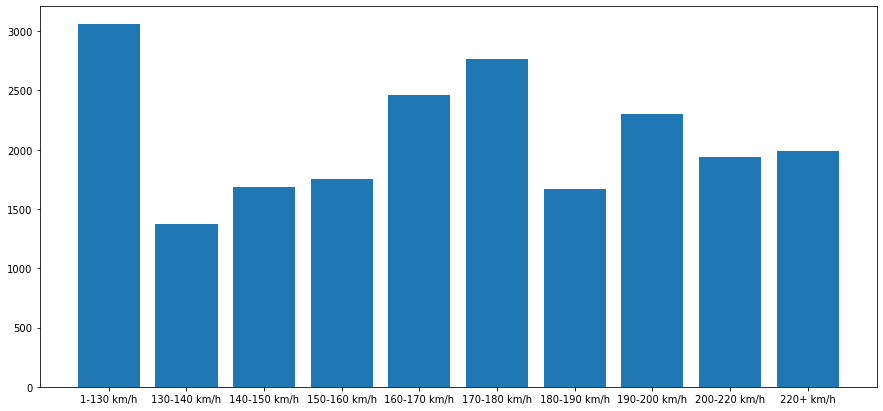

In [6]:
plt.figure(figsize=(15, 7))
plt.bar(df_group_vc['VehMaxSpeed'], df_group_vc['AvgClaim'])
plt.show()

Выброс в категории 1-130 обусловлен (гипотеза):

Мало автомобилей в этой категории, поэтому высокий ущерб даже по отдельным автомобилям быстрее повышает средний ущерб по категории. Под категорию с такой малой максимальной скоростью, возможно, подходят дорогостоящие раритетные автомобили, цена которых очень высока, следовательно, ущерб от повреждения таких автомобилей высокий.